In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
img = Image.open('data/images/street.jpg').convert('RGB')

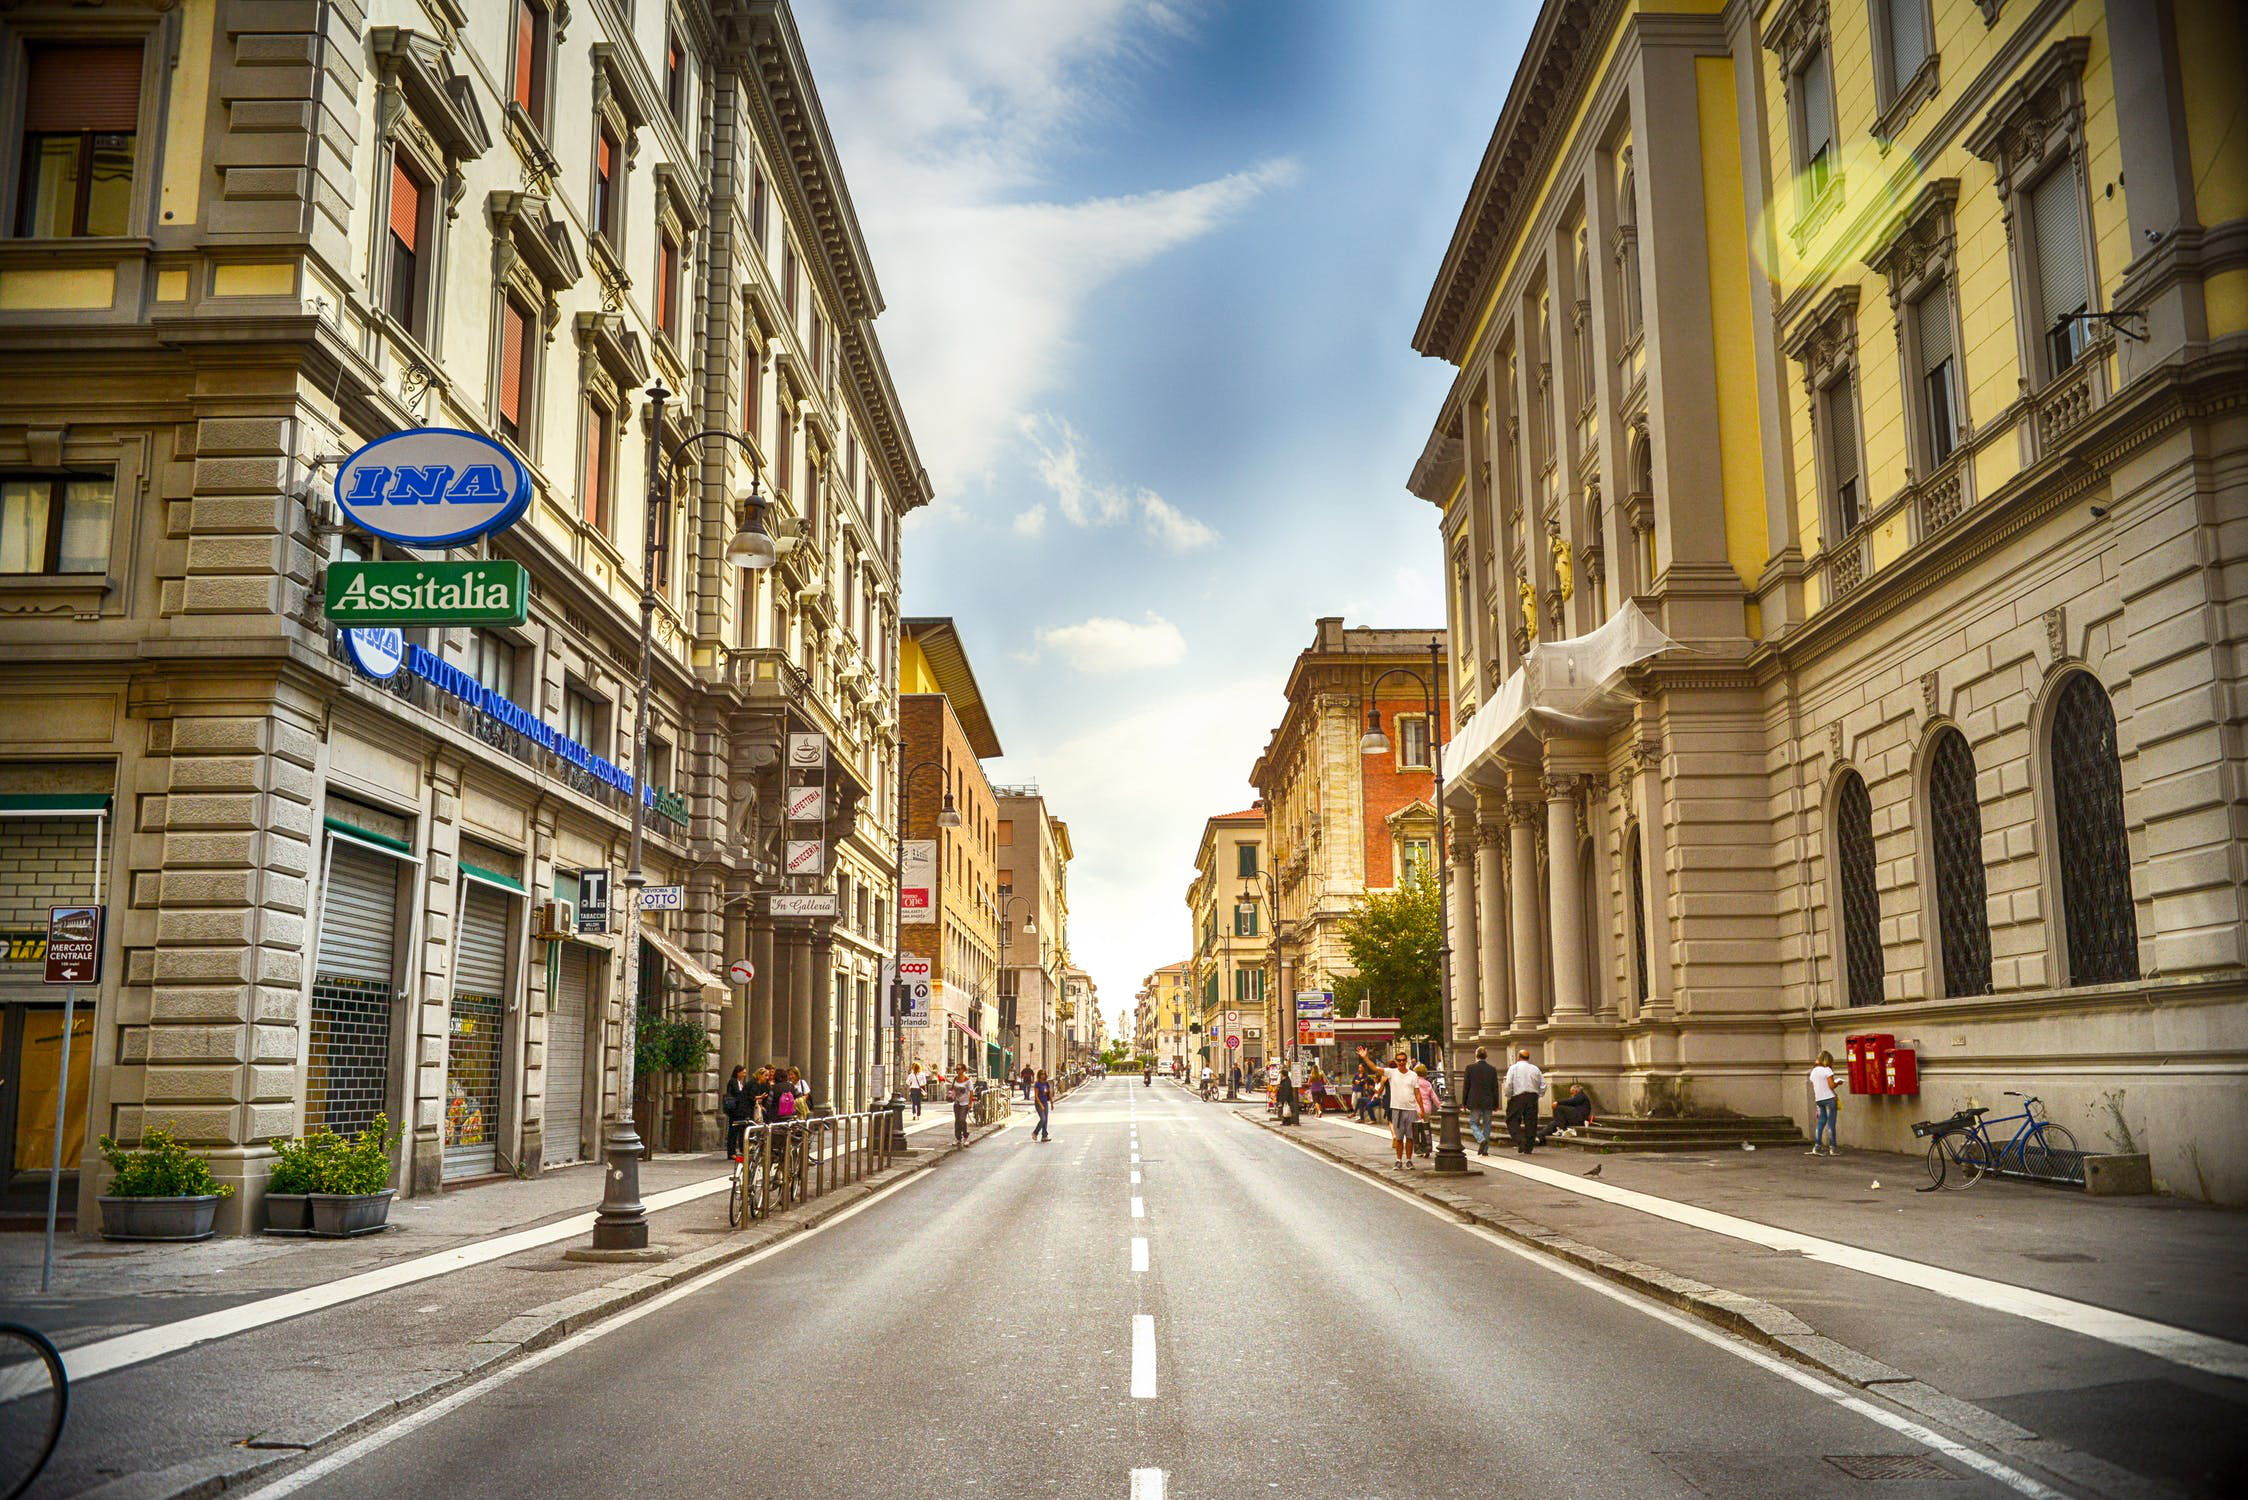

In [4]:
img

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as T

In [6]:
transforms = T.Compose([
    T.Resize(400),
    T.ToTensor(),
])

In [22]:
img_tensor = transforms(img)
img_tensor.shape

torch.Size([3, 400, 599])

In [11]:
sharpen_kernel = [[
    [[0,-1,0]],
    [[-1,5,-1]],
    [[0,-1,0]]
]]
conv_filter = torch.Tensor(sharpen_kernel)
conv_filter.shape

torch.Size([1, 3, 1, 3])

In [23]:
img_tensor = img_tensor.unsqueeze(0) # add a batch dimension

In [24]:
img_tensor.shape

torch.Size([1, 3, 400, 599])

In [14]:
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)

In [15]:
conv_tensor.shape

torch.Size([1, 1, 400, 597])

In [16]:
conv_img = conv_tensor.squeeze(0)
conv_img.shape

torch.Size([1, 400, 597])

In [17]:
conv_img = conv_img.numpy().squeeze()
conv_img.shape

(400, 597)

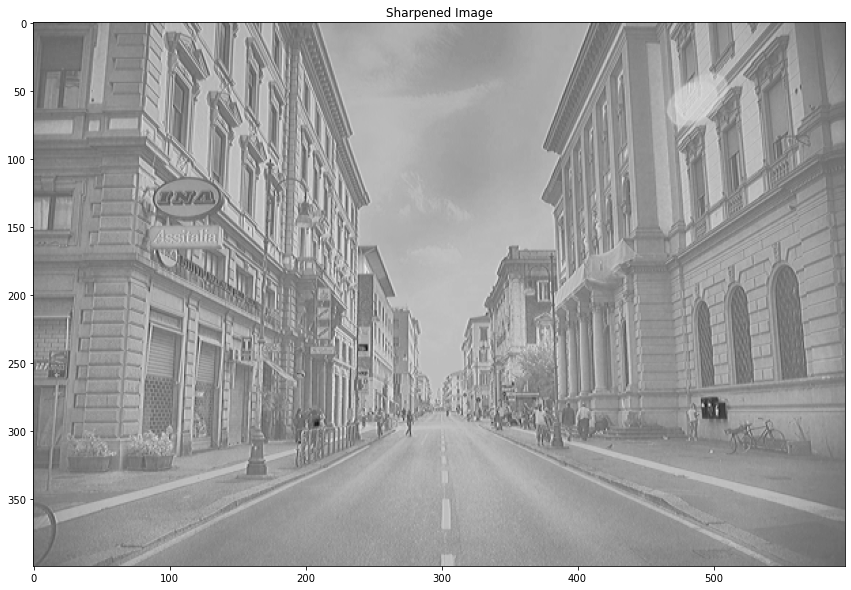

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(conv_img, cmap='gray')
plt.title('Sharpened Image');

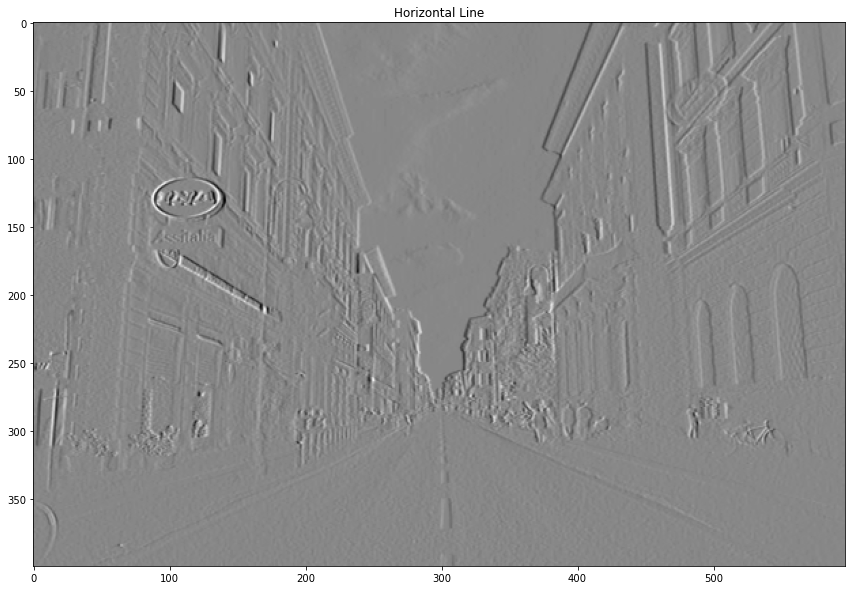

In [26]:
horizontal_line_kernel = [[
    [[1, 0, -1]],
    [[0, 0, 0]],
    [[-1, 0, 1]]
]]
conv_filter = torch.Tensor(horizontal_line_kernel)
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)
conv_img = conv_tensor.squeeze(0)
conv_img = conv_img.numpy().squeeze()
plt.figure(figsize=(20,10))
plt.imshow(conv_img, cmap='gray')
plt.title('Horizontal Line');

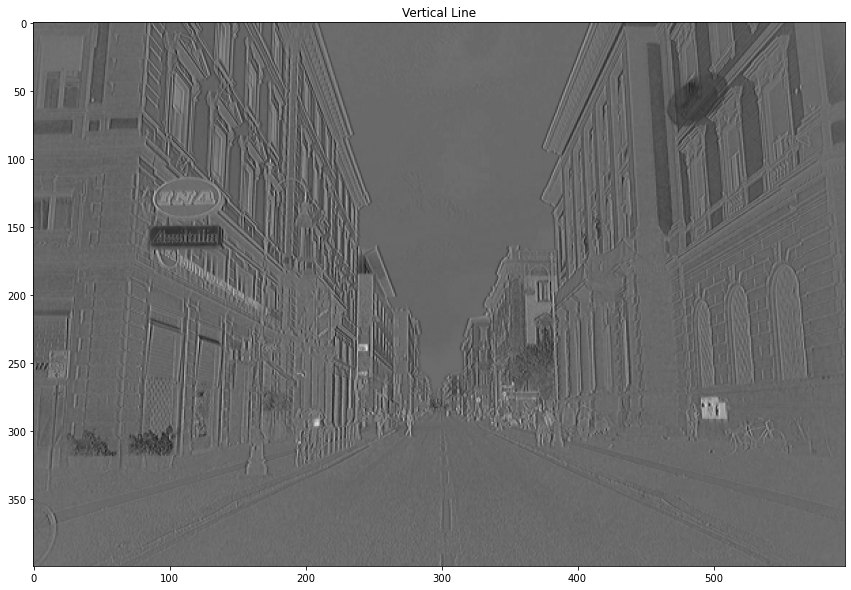

In [27]:
vertical_line_kernel = [[
    [[0, 1, 0]],
    [[1, -4, 1]],
    [[0, 1, 0]]
]]

conv_filter = torch.Tensor(vertical_line_kernel)
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)
conv_img = conv_tensor.squeeze(0)
conv_img = conv_img.numpy().squeeze()
plt.figure(figsize=(20,10))
plt.imshow(conv_img, cmap='gray')
plt.title('Vertical Line');

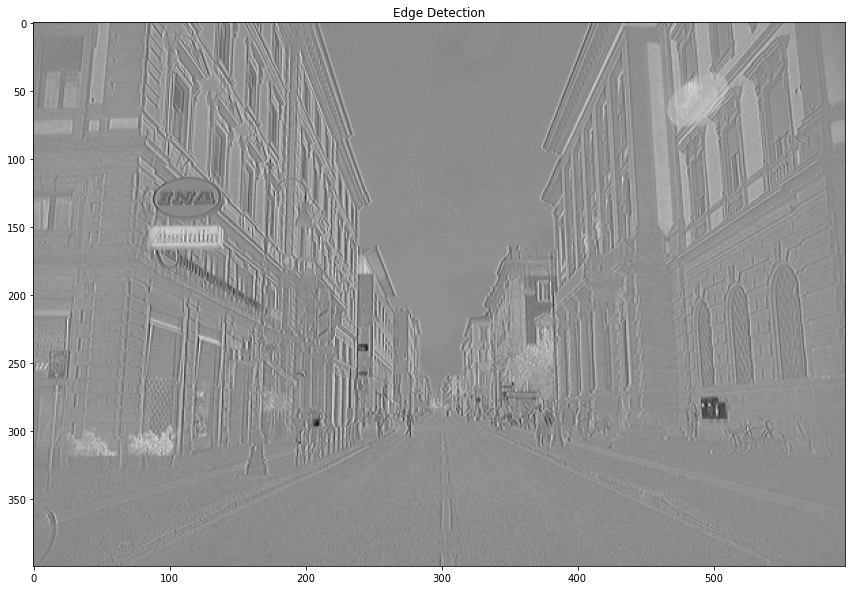

In [28]:
edge_detection_kernel = [[
    [[-1, -1, -1]],
    [[-1, 8, -1]],
    [[-1, -1, -1]]
]]
conv_filter = torch.Tensor(edge_detection_kernel)
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)
conv_img = conv_tensor.squeeze(0)
conv_img = conv_img.numpy().squeeze()
plt.figure(figsize=(20,10))
plt.imshow(conv_img, cmap='gray')
plt.title('Edge Detection');

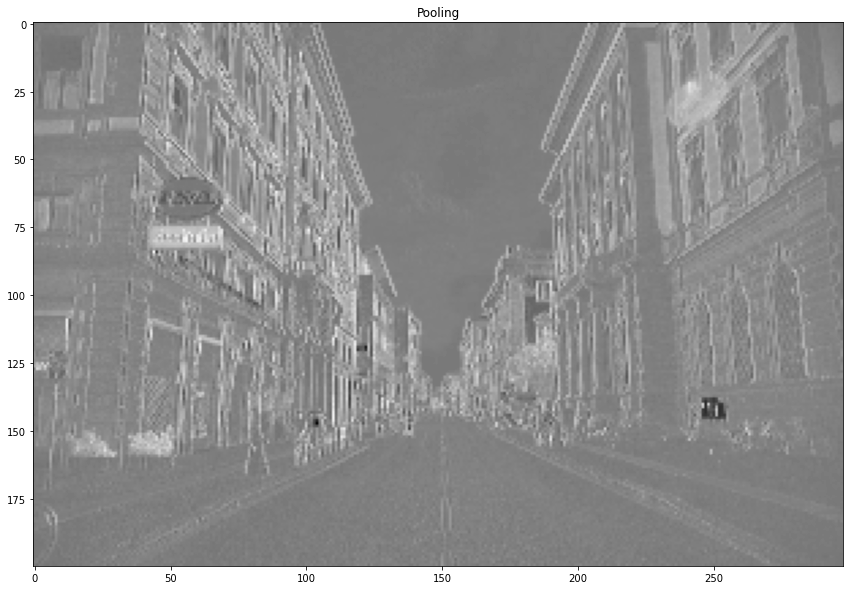

In [29]:
pool = nn.MaxPool2d(2, 2)
pool_tensor = pool(conv_tensor)
pool_img = pool_tensor.squeeze(0)
pool_img = pool_img.numpy().squeeze()
plt.figure(figsize=(20,10))
plt.imshow(pool_img, cmap='gray')
plt.title('Pooling');

In [30]:
import gc
gc.collect()

21817